In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [3]:
### impoteren function 
def sigmoid(w,b,range=10):
    """
    
    """
        
    f = lambda x : 1/(1+np.exp(-x))
    x = np.linspace(-range,range)
    x = np.array([x,x]).T
    z = np.array( [ np.array(w).dot(i)+b for i in x])
    result = np.array([f(i) for i in z])
    return z,result

def error_0(x):
       return  -np.log(1-x)
    
def error_1(x):
      return -np.log(x)

# Cost function -logistic regresion notes

Suppose we have a generic training set N: 
$$N={(x^{1},y^{1}),(x^{2},y^{2}),(x^{3},y^{3}),...,(x^{m},y^{m})}$$
made of m training examples where $ (x^{1},y^{1})$ is the first example and so on.More specificaly $x^{m}$ is the m-th imput variable of m ,while $y^{m}$ is its output,traget or label variable .Being this classification every output variable $y^{m}$
is bound between {0,1}. $y \in [0,1]$.
Each example $x^{n}$ is represented as usual by its feature vector
$$ \vec{x} =\quad  \begin{bmatrix}   x_0 \\ x_1 \\ ... \\ x_n\end{bmatrix}\quad  $$
where $x_0 = 1$ always .This generic example we don't know the exact  number of feature .Finaly we have a hypotesis function of logistic regresion ,matematicaly written as :
 $$h_{\theta}(\vec{x})= \frac{1}{1+e^{-\vec{\theta}.\vec{X}}}=\frac{1}{1+e^{-\theta^T.X}}$$
 $h_{\theta}(X)$ is also called sigmoid function ,graphicaly look like this :
 
 

Text(0.5, 1.0, 'SIgmoid')

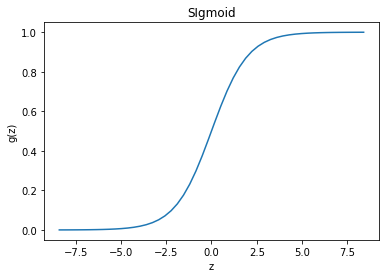

In [4]:
x,y = sigmoid([0.001,0.004],0.0008,range=1680)
plt.plot(x,y)
plt.xlabel('z')
plt.ylabel('g(z)')
plt.title('SIgmoid')

For now we just to notice that the most importent properties the sigmoid function varies between $y\in [0,1]$  for every $x\in [- \infty,\infty]$ <br>
This mathematicaly propeties is verry can be expremy useful for clasification problem.
The main puprose of logistic regression is to chose the best parametes $\Theta s = \Theta_0,\Theta_1,..,\Theta_m $  acording to given training set in order to minimize errors.
* The good known gradient descent is not able to do this optimizsation problem ,because the function is not convent ,it has a many minimum ,therefore we have to choose other method for optimization
The cost fucntion for Logistic regression is difined as :
$$   Cost(h_{\Theta}(x),y) = \Bigg( \begin{matrix}  -log(h_{\Theta}(x)) && if\; y=1 \\log( 1 - h_{\Theta}(x)) && if\; y=0\end{matrix}\Bigg)  $$

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


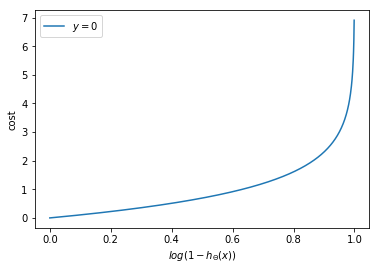

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


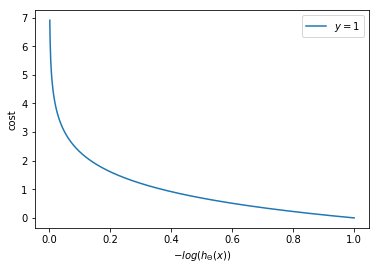

In [5]:
sigmoid_values = np.linspace(0, 1, 1000)
plt.plot(sigmoid_values, error_0(sigmoid_values), label = "$y=0$")
plt.xlabel(r'$log(1 - h_{\Theta}(x))$')
plt.ylabel('cost')
plt.legend()
plt.show()
plt.plot(sigmoid_values, error_1(sigmoid_values), label = "$y=1$")
plt.xlabel(r'$-log(h_{\Theta}(x))$')
plt.ylabel('cost')
plt.legend()
plt.show()

we have just seen is the  verbose version of cost function for logistic regression ,We can make it more compact into a one line
expression : this help us to avoiding boring if/else statement when converting this formula into an algorithm. : The expresion looks like this : <br> <br>
$$ Cost(h_{\Theta}(x),y) = -y.log(h_{\Theta}(x)) - (y-1)log(1 - h_{\Theta}(x))$$ 

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


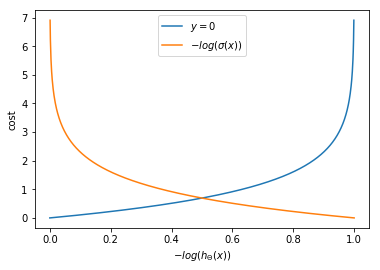

In [6]:
sigmoid_values = np.linspace(0, 1, 1000)
plt.plot(sigmoid_values, error_0(sigmoid_values), label = "$y=0$")
plt.xlabel(r'$log(1 - h_{\Theta}(x))$')
plt.ylabel('cost')
plt.legend()
plt.plot(sigmoid_values, error_1(sigmoid_values), label = "$-log(\sigma(x))$")
plt.xlabel(r'$-log(h_{\Theta}(x))$')
plt.ylabel('cost')
plt.legend()
plt.show()

## The above graphics is called cross-etropy function ,which can be used as cost function for logistic regression

The logistic regression cost function for all input variable can be rewritten as :
  $$ J(\Theta) = \sum_i^mCost(h_{\Theta}(x_i),y_i)=-\frac{1}{m}\big(\sum_i^my_i.log(h_{\Theta}(x_i)) + (y_i-1)log(1 - h_{\Theta}(x_i))\big)$$

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


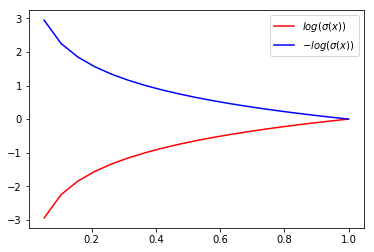

In [7]:
x = np.linspace(0,1,20)
y = [np.log(i) for i in x ]
y1 = [-np.log(i) for i in x ]

plt.plot(x,y,color='red',label=r'$log(\sigma(x))$')
plt.plot(x,y1,color='blue',label=r'$-log(\sigma(x))$')
plt.legend()


<h3><font color='red'>
    How we can find the min entropy ?
<\font> <\br><h3>


Let notice the fact  : if $log(\sigma(x))$ which is with red line describes the cost function in case when y = 1,then the max value show the min entropy.If get the function $-log(\sigma(x))$ then the min value show also min entropy.which function is more appropriative for our purpose . 

### Optimization problem

let to define step by step what must happen and why logistic works before finding our optimization function. Firstly optimization function will be the well-know  Gradient descent although, that is not the best choice one


Let to generate out training data from back to front : 
1) We should define the training data taking into acout that the variables will be linear dependent to one hidden variable,wich will the argument of sigmoid.

Let to difine $z = a*x + b$ where $a=2$ and $b=4$ and use to define some sequence ,find the out from sigmoid, 

Then out main purpose will be to find a,b from back to front,and to see is approximatlyu equal

In [8]:

#define z argument as lininear euation of z = 2*x + 4
z_f = lambda x : 2*x+4
x = np.linspace(-10,10,30)

z_args = np.array([z_f(i) for i in x])


In [9]:
def sigmoid(z):
    result = [1/(1+np.exp(-i)) for i in z ]
    return result

In [11]:

y_prime = np.array( sigmoid(z_args))


#### let to define the label value acording above sigmoid genereated from z = 2*x + 4


In [12]:
print(y_prime.shape)
print(z_args.shape)
print(x.shape)

(30,)
(30,)
(30,)


In [24]:
## generate labeled  from already define y_prime data given the sigmoid with args z = 2*x+4
def generated_label(i):
        if i < 0.5 :
            return 0
        elif i > 0.5 :
            return 1
        else :
            return np.random.randint(0,2)

In [36]:
y_label = np.array([generated_label(i) for i in y_prime])


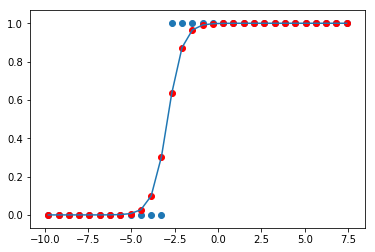

In [37]:
plt.plot(z_args,y_prime)
plt.scatter(z_args,y_label)
plt.scatter(z_args,y_prime,color='red')
# plt.plot(z_args,y_label,color='red')

In [38]:
print(y_prime.shape)
print(z_args.shape)
print(y_label.shape)
data = np.array([z_args,y_label]).T
data

(30,)
(30,)
(30,)


array([[-9.79      ,  0.        ],
       [-9.19689655,  0.        ],
       [-8.6037931 ,  0.        ],
       [-8.01068966,  0.        ],
       [-7.41758621,  0.        ],
       [-6.82448276,  0.        ],
       [-6.23137931,  0.        ],
       [-5.63827586,  0.        ],
       [-5.04517241,  0.        ],
       [-4.45206897,  0.        ],
       [-3.85896552,  0.        ],
       [-3.26586207,  0.        ],
       [-2.67275862,  1.        ],
       [-2.07965517,  1.        ],
       [-1.48655172,  1.        ],
       [-0.89344828,  1.        ],
       [-0.30034483,  1.        ],
       [ 0.29275862,  1.        ],
       [ 0.88586207,  1.        ],
       [ 1.47896552,  1.        ],
       [ 2.07206897,  1.        ],
       [ 2.66517241,  1.        ],
       [ 3.25827586,  1.        ],
       [ 3.85137931,  1.        ],
       [ 4.44448276,  1.        ],
       [ 5.03758621,  1.        ],
       [ 5.63068966,  1.        ],
       [ 6.2237931 ,  1.        ],
       [ 6.81689655,

In [50]:
label = data[:,1] #.reshape(-1, 1)
trained_data = data[:,0]


In [53]:
trained_data.T.shape
trained_data =trained_data.reshape(-1, 1)

In [82]:
reg = LogisticRegression(C=10)
reg.fit(trained_data,label)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [83]:
print("a = ",reg.coef_)
print("b=",reg.intercept_)

a =  [[1.47661232]]
b= [4.03146926]


In [84]:
z_f = lambda x : 1.47*x+4
x = np.linspace(-10,10,30)

z_args = np.array([z_f(i) for i in x])
y_logi = np.array( sigmoid(z_args))

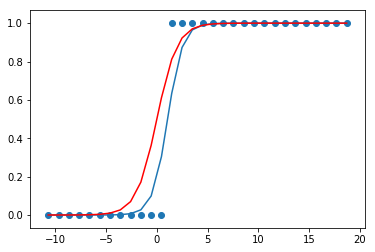

In [85]:
plt.plot(z_args,y_prime)
plt.scatter(z_args,y_label)
plt.plot(z_args,y_logi,color='red')

Let to move forward optimization problem,how we can find the best fit parameter a,b

  $$ J(\Theta) = \sum_i^mCost(h_{\Theta}(x_i),y_i)=-\frac{1}{m}\big(\sum_i^my_i.log(h_{\Theta}(x_i)) + (1-y_i)log(1 - h_{\Theta}(x_i))\big)$$

<h3> let to find some derivates of function wich will be very useful </h3>

<br>
$$ 1 )\; \; \frac{\partial h_{\Theta(z)}}{\partial x_i } = \frac{d h_{\Theta(z)}}{dz}.\frac{\partial z}{\partial x_i}  $$



<br> <br>

$$ 2)\; \; \frac{d h_{\Theta(z)}}{dz} = \frac{\frac{1}{1+e^{-z}}}{dz}= \frac{e^{-z}}{(1+e^{-z})^2}=\frac{1}{1+e^{-z}}(1 -\frac{1}{1+e^{-z}} ) = h_{\Theta}(z)(1 - h_{\Theta}(z))  $$ <br> <br>



$$ 3) \; \ \frac{dlog(h_{\Theta}(x_i))}{dz} = \frac{1}{h_{\Theta}(z)}\frac{dh_{\Theta}(z))}{dz} =\frac{1}{h_{\Theta}(z)} h_{\Theta}(z)(1 - h_{\Theta}(z))=(1 - h_{\Theta}(z)) $$


<br> <br>
$$ 4) \frac{dlog(1 - h_{\Theta}(z))}{dz} = \frac{1}{(1- h_{\Theta}(z))}\frac{d(1-h_{\Theta}(z)))}{dz} = \frac{1}{(1- h_{\Theta}(z))}\frac{-d(h_{\Theta}(z)))}{dz}=-\frac{1}{(1-h_{\Theta}(z))} h_{\Theta}(z)(1 - h_{\Theta}(z))=- h_{\Theta}(z)) $$

Let to find partial derivate of function  $J(\Theta)$ respect a and b
<br>$$4) \; \; \dot{J}(\theta)_a=\frac{\partial J(\theta)}{\partial a} =  $$ <br>

<br>
$$ -\frac{1}{m}\sum_i^m\big(y_i \frac{\partial log(h_{\Theta}(z))}{\partial a}+  (1-y_i) \frac{\partial log(h_{\Theta}(z)-1)}{\partial a}\big) = $$ <br> <br>

$$-\frac{1}{m}\sum_i^m\big(y_i \frac{dlog(h_{\Theta}(z))}{dz}\frac{\partial z}{\partial a}+  (y_i-1) \frac{dlog(1- h_{\Theta}(z))}{dz}\frac{\partial z}{\partial a}\big) =  $$ <br>

When we apply the eqation 3) 4) we achieve
$$-\frac{1}{m}\sum_i^m\big(y_i (1 - h_{\Theta}(z))\frac{\partial z}{\partial a}+  (1-y_i) (- h_{\Theta}(z))\frac{\partial z}{\partial a})\big) =  $$ <br>
$$-\frac{1}{m}\sum_i^m\big(y_i\frac{\partial z}{\partial a} -y_ih_{\Theta}(z))\frac{\partial z}{\partial a} +y_ih_{\Theta}(z))\frac{\partial z}{\partial a} - h_{\Theta}(z)\frac{\partial z}{\partial a}) =   $$ <br>







$$1) \; \; -\frac{1}{m}\sum_i^m\big(y_i\frac{\partial z}{\partial a} - h_{\Theta}(z)\frac{\partial z}{\partial a}\big) $$
from $ \frac{\partial z}{\partial a}=\frac{\partial (ax +b)}{{\partial a}=x$


we achieve as final $$11)  \; \frac{\partial J(\theta)}{\partial a} = -\frac{1}{m}\sum_i^m\big((y_i - h_{\Theta}(z))x_i\big) $$


from $ \frac{\partial z}{\partial b}=\frac{\partial (ax +b)}{\partial b}=1 $

from  $$12) \; \frac{\partial J(\theta)}{\partial b} = -\frac{1}{m}\sum_i^m\big((y_i - h_{\Theta}(z))\big) $$









The next step is to implement gradient descent using 11) 12)

$$ 13) \; \; a = a  - \frac{\partial J(\theta)}{\partial a} $$ <br> <br>
$$ 14) \; \; a = a  + \frac{1}{m}\sum_i^m\big((y_i - h_\theta(a.x_i + b))x_i\big) $$ <br>
$$ 15) \; \; b = b  - \frac{\partial J(\theta)}{\partial b} $$ <br>
$$ 16) \; \; a = a  + \frac{1}{m}\sum_i^m\big((y_i -\theta(a.x_i + b))\big) $$ <br>